In [6]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=094e203d3337aa38d16204c37a951d24113d25db9766e98fc4d93b452c4ce6a7
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Plotting
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot")

from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping , ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error

import warnings
import warnings
warnings.filterwarnings('ignore')






In [9]:
df=pd.read_csv("D:/Projects/Apple stock price prediction 1980-2021/AAPL.csv", parse_dates=['Date'])
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600


#### Checking Null Values

In [10]:
df.isna().mean() # Checking the null value

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

There are no null values

In [11]:
df["Date"]=pd.to_datetime(df.Date,dayfirst=True)
df.set_index("Date",inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600
...,...,...,...,...,...,...
2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700
2021-09-02,153.869995,154.720001,152.399994,153.649994,153.649994,71115500
2021-09-03,153.759995,154.630005,153.089996,154.300003,154.300003,57808700


In [12]:
df=df.asfreq("d")
df = df.fillna(method  = "bfill")

Text(0, 0.5, 'open price')

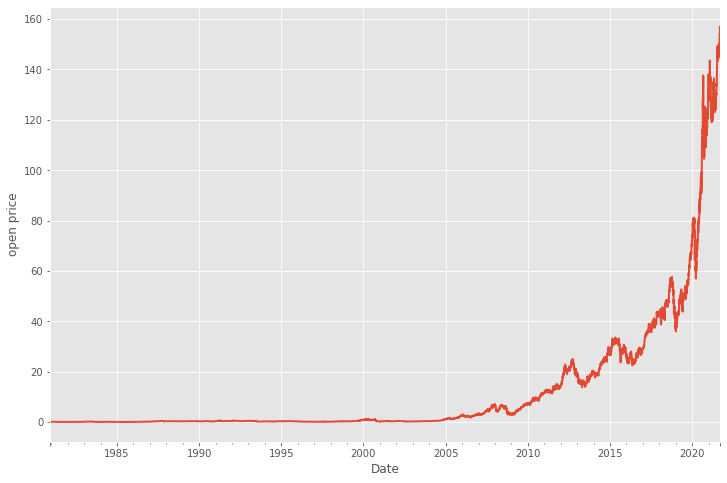

In [13]:
df['Open'].plot(figsize=(12,8))
plt.ylabel("open price")

Text(0, 0.5, 'Volume price')

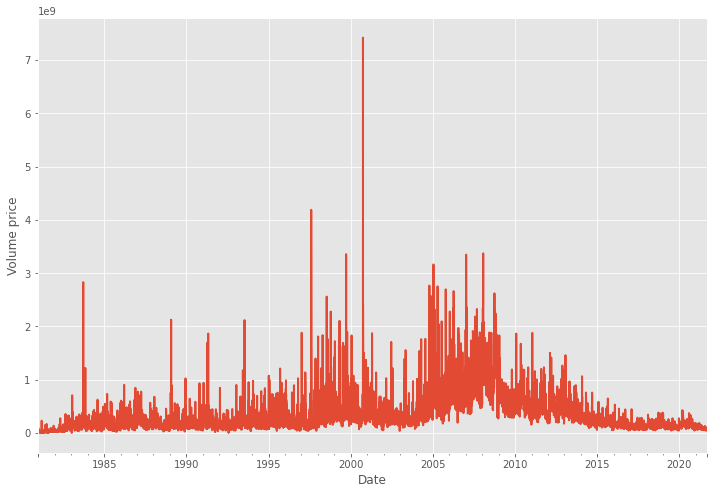

In [14]:
df['Volume'].plot(figsize=(12,8))
plt.ylabel("Volume price")

In [15]:
df['Total Pos'] = df.sum(axis=1)

Text(0.5, 1.0, 'Total Portfolio Value')

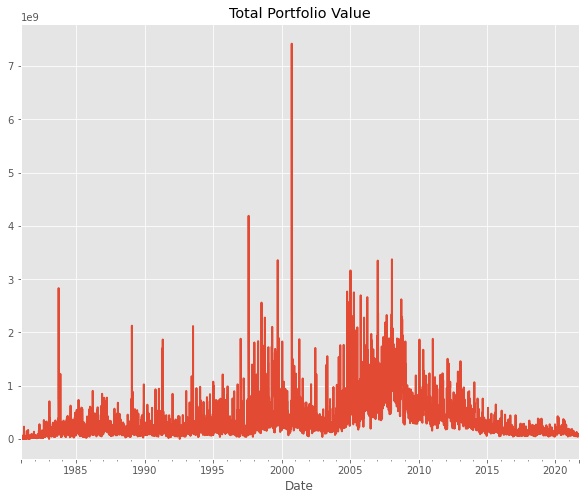

In [16]:
df['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

In [17]:
df['Daily Return'] = df['Total Pos'].pct_change(1)

In [18]:
df['Daily Return'].mean()

8905.413661168095

<AxesSubplot:ylabel='Density'>

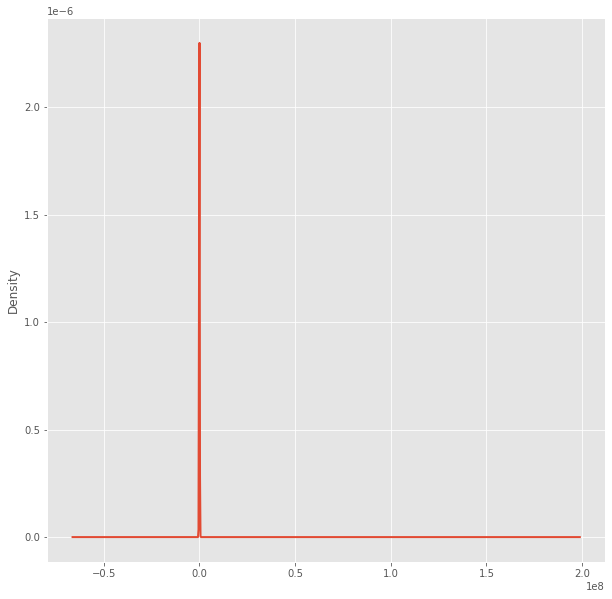

In [19]:
df['Daily Return'].plot(kind='kde')

In [20]:
SR = df['Daily Return'].mean()/df['Daily Return'].std()

<AxesSubplot:xlabel='Date'>

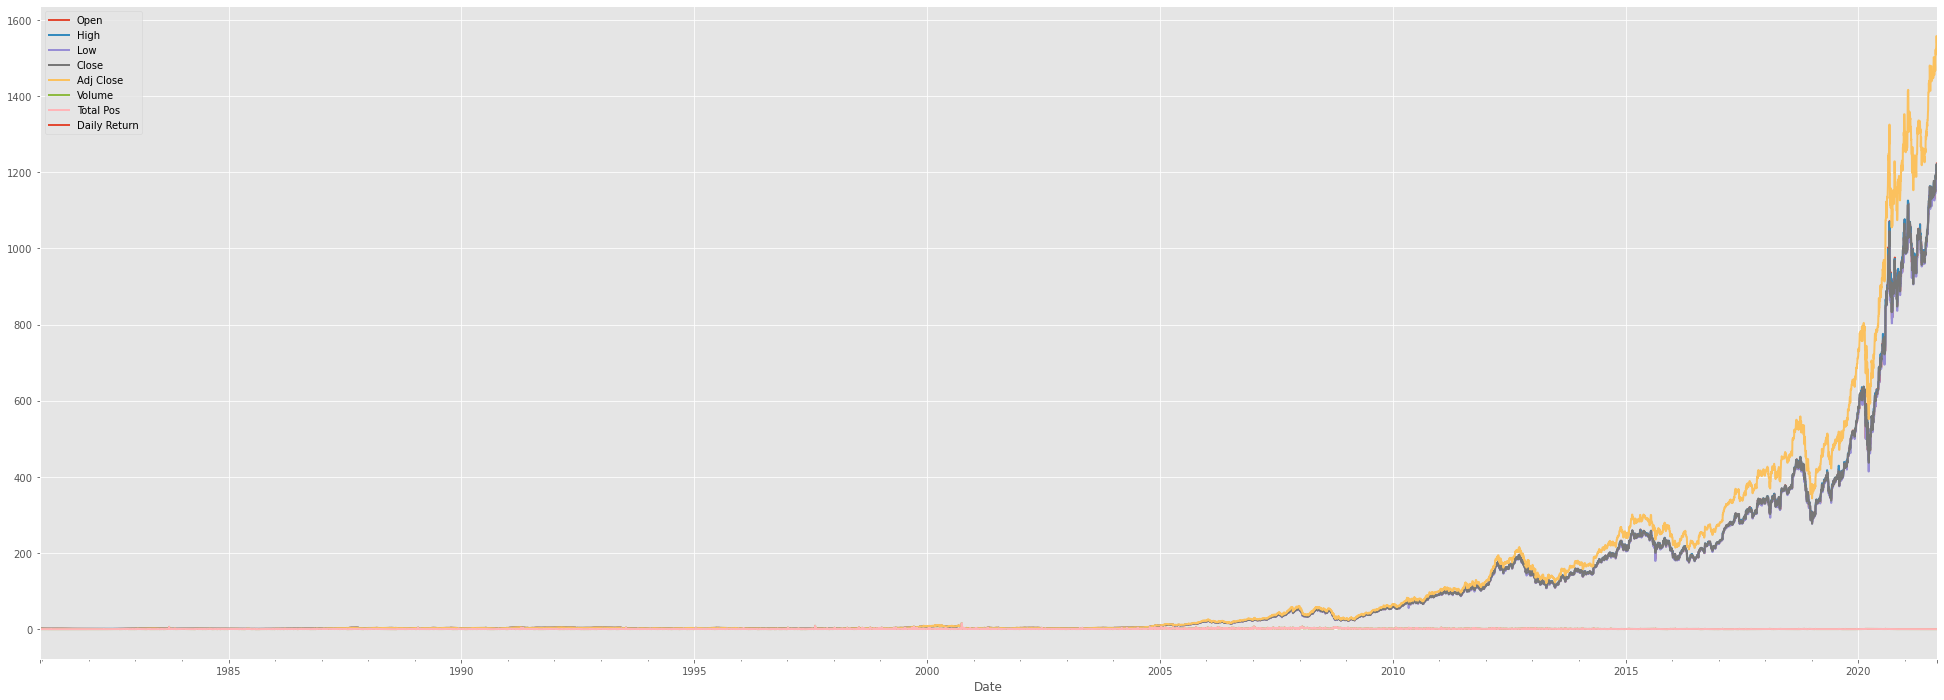

In [21]:
all_plot = df/df.iloc[0]
all_plot.plot(figsize=(34,12))

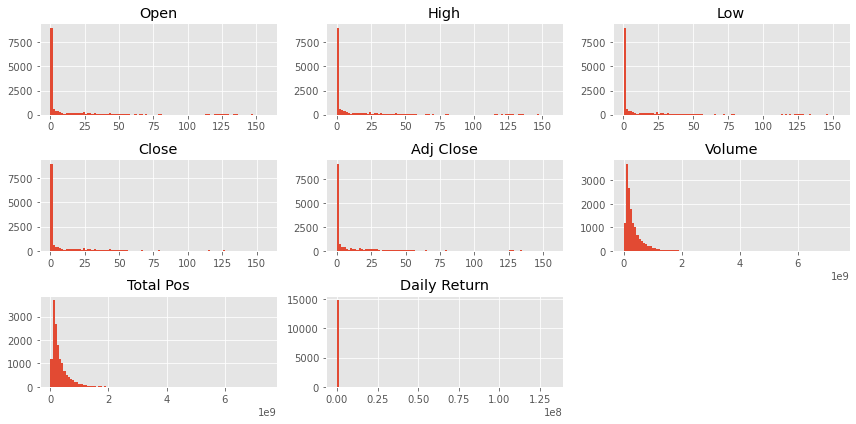

In [22]:
df.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [23]:
df.resample(rule='A').mean()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return
Date,,,,,,,,
1980-12-31,0.137890,0.138281,0.137723,0.137723,0.107948,1.006622e+08,1.006622e+08,-0.081828
1981-12-31,0.108939,0.109297,0.108585,0.108585,0.085109,3.219831e+07,3.219831e+07,363044.503869
1982-12-31,0.085491,0.086622,0.084597,0.085390,0.066929,7.955891e+07,7.955891e+07,0.100908
1983-12-31,0.167658,0.171274,0.163520,0.167363,0.131181,1.705623e+08,1.705623e+08,0.499909
1984-12-31,0.119775,0.122088,0.117448,0.119555,0.093708,1.614866e+08,1.614866e+08,0.095141
1985-12-31,0.091026,0.091943,0.089874,0.090127,0.070642,1.732520e+08,1.732520e+08,0.120049
1986-12-31,0.144779,0.147176,0.142252,0.144956,0.113618,2.032631e+08,2.032631e+08,0.087721
1987-12-31,0.347221,0.354814,0.338359,0.346320,0.271974,2.285255e+08,2.285255e+08,0.080202
1988-12-31,0.370630,0.376351,0.364757,0.370850,0.293294,1.586265e+08,1.586265e+08,0.098004


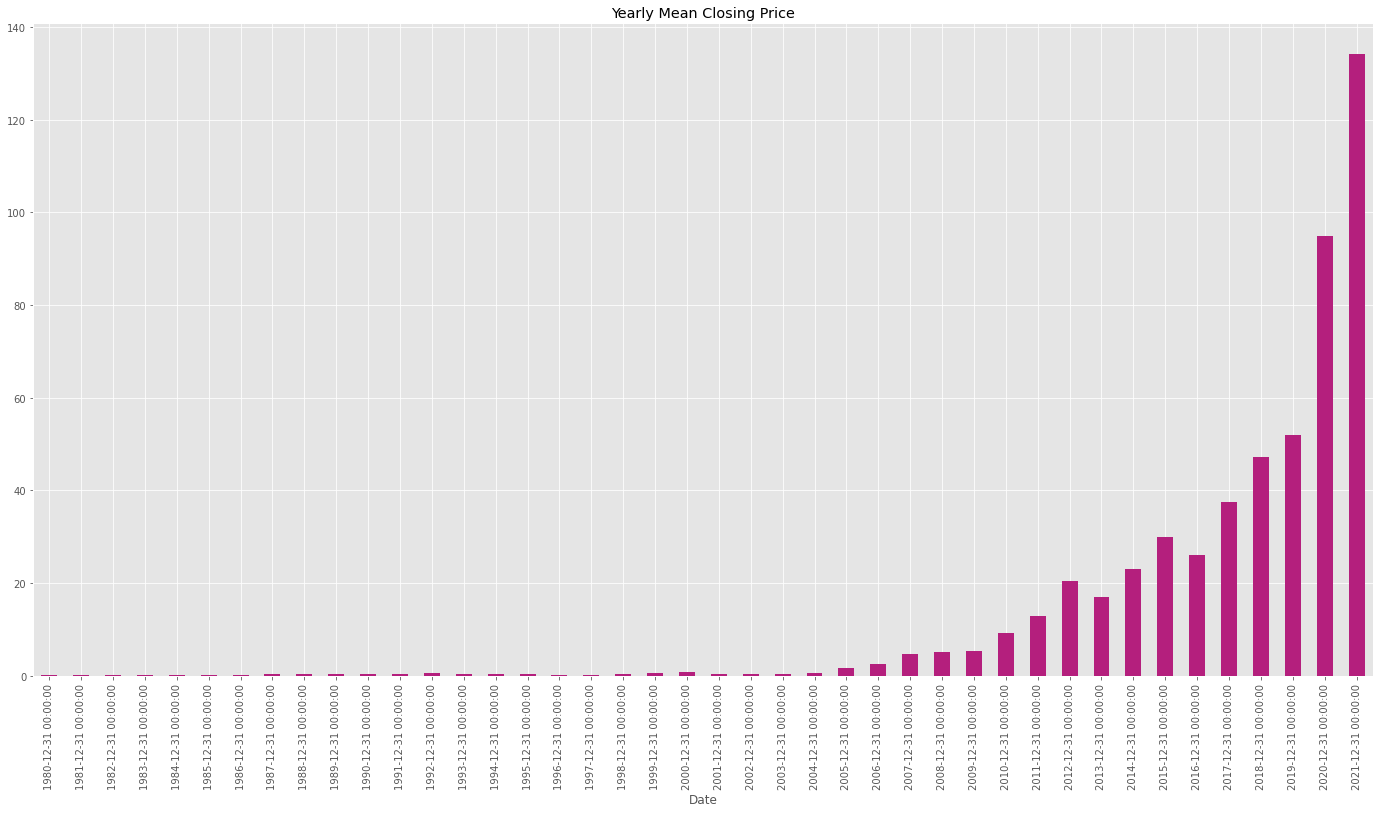

In [24]:
title = 'Yearly Mean Closing Price'
df['Open'].resample('A').mean().plot.bar(title=title,color=['#b41f7d'] , figsize=(24,12));

In [25]:
df['6-month-SMA'] = df['Open'].rolling(window=6).mean()
df['12-month-SMA'] = df['Open'].rolling(window=12).mean()
df['2-month-SMA'] = df['Open'].rolling(window=2).mean()

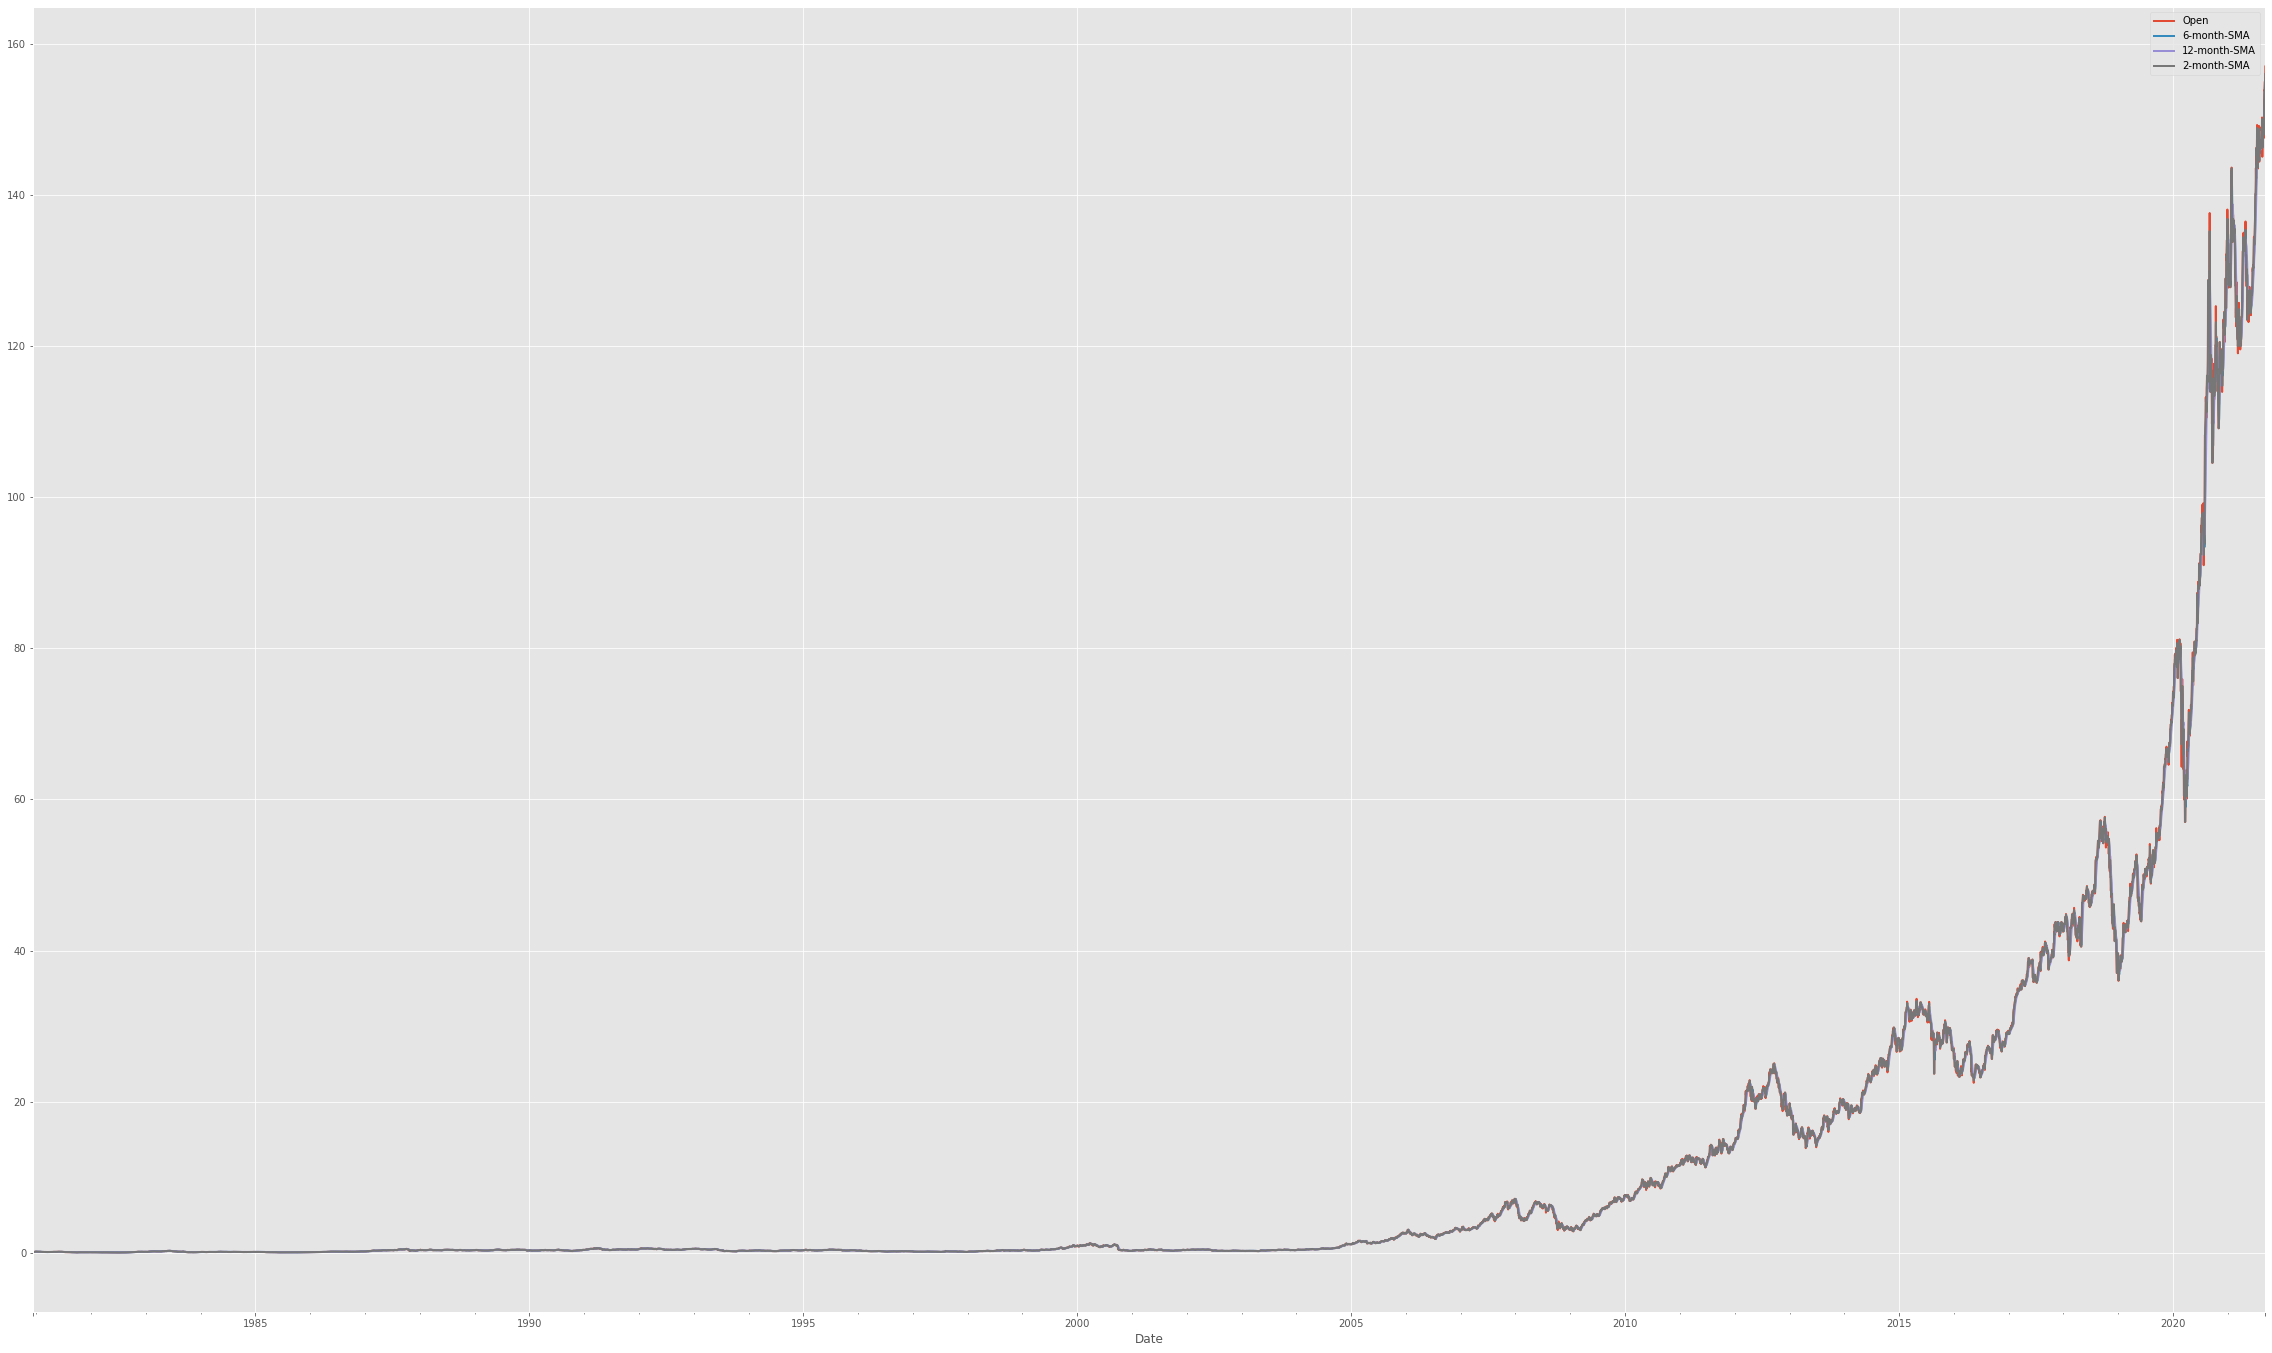

In [26]:
df[["Open","6-month-SMA","12-month-SMA","2-month-SMA"]].plot(figsize=(40,24));

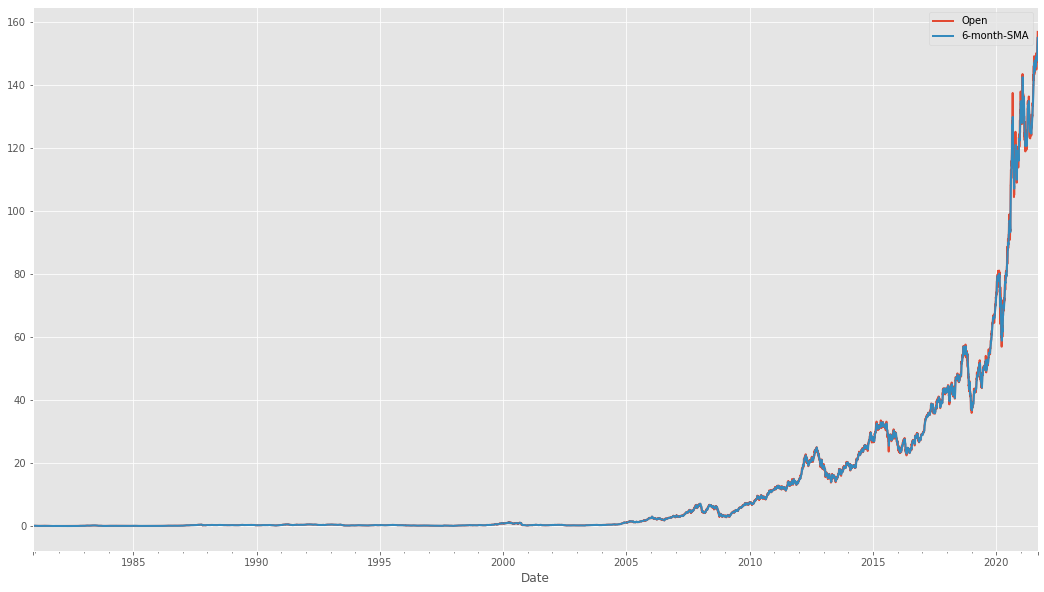

In [27]:
df[["Open","6-month-SMA"]].plot(figsize=(18,10));

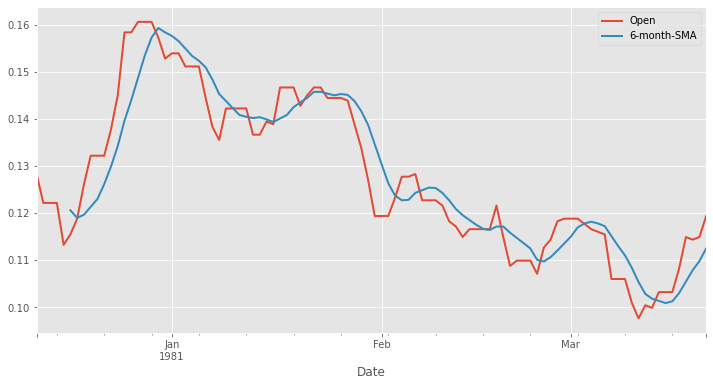

In [28]:
df[['Open','6-month-SMA']].iloc[:100].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [29]:
df['EWMA12'] = df['Open'].ewm(span=14,adjust=True).mean()

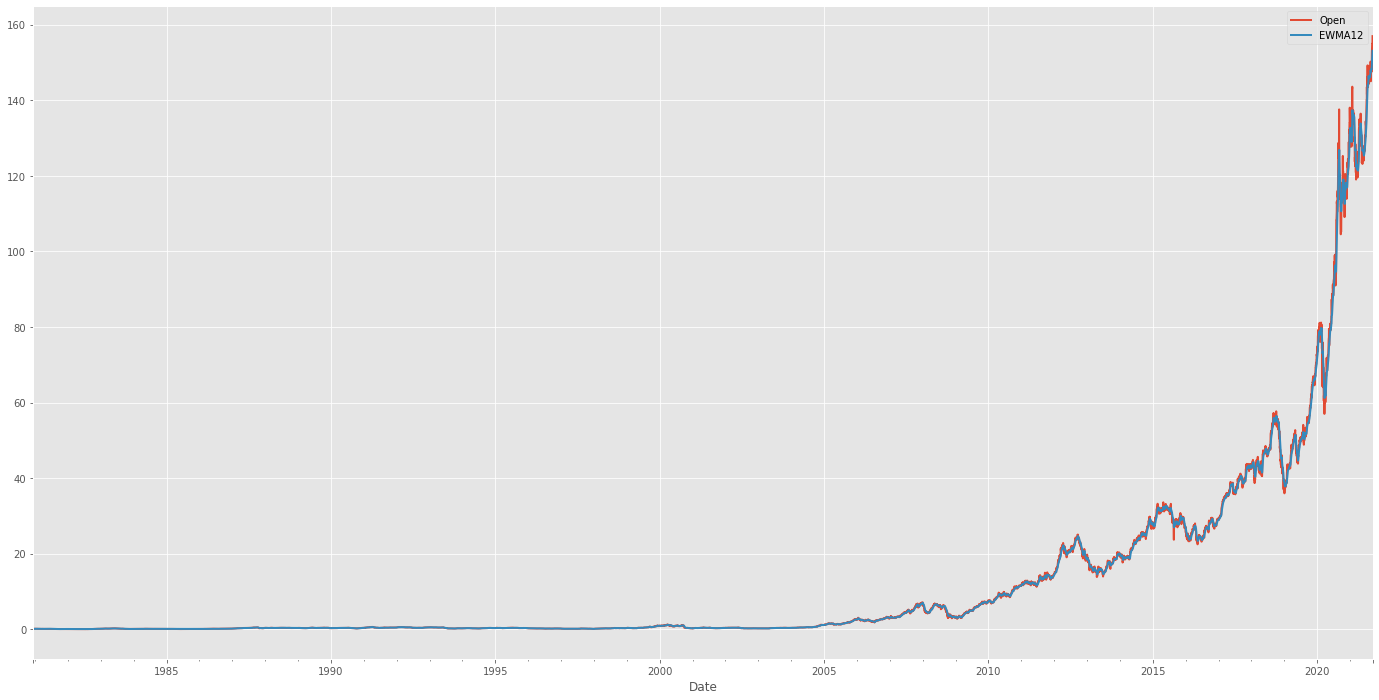

In [30]:
df[['Open','EWMA12']].plot(figsize=(24,12));

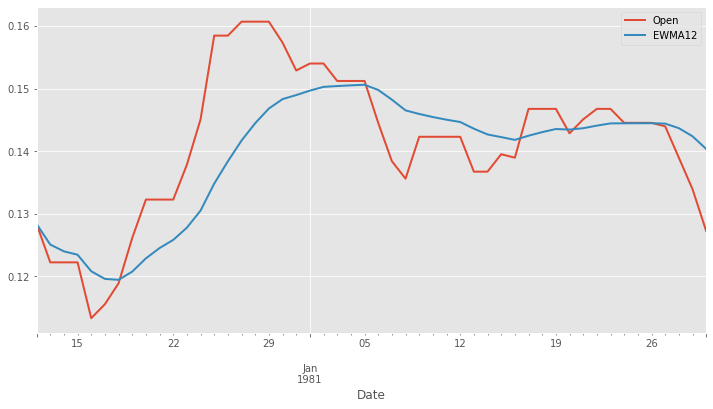

In [31]:
df[['Open','EWMA12']].iloc[:50].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [32]:
df['EWMA12'] = df['Open'].ewm(span=14,adjust=True).mean()

In [33]:
span = 8
alpha = 2/(span+1)

In [34]:
df['EWMA12'] = df['Open'].ewm(alpha=alpha,adjust=False).mean()

In [35]:
model=SimpleExpSmoothing(df["Open"])

In [36]:
model.fit(smoothing_level=alpha,optimized=False)

In [37]:
fitted_model=model.fit(smoothing_level=alpha,optimized=False)

In [38]:
fitted_model.fittedvalues

Date
1980-12-12      0.128348
1980-12-13      0.128348
1980-12-14      0.126984
1980-12-15      0.125923
1980-12-16      0.125098
                 ...    
2021-09-04    151.686212
2021-09-05    152.415943
2021-09-06    152.983511
2021-09-07    153.424953
2021-09-08    153.768297
Freq: D, Length: 14881, dtype: float64

In [39]:
fitted_model.fittedvalues.shift(-1)

Date
1980-12-12      0.128348
1980-12-13      0.126984
1980-12-14      0.125923
1980-12-15      0.125098
1980-12-16      0.122472
                 ...    
2021-09-04    152.415943
2021-09-05    152.983511
2021-09-06    153.424953
2021-09-07    153.768297
2021-09-08           NaN
Freq: D, Length: 14881, dtype: float64

In [40]:
df["SES12"]=fitted_model.fittedvalues.shift(-1)

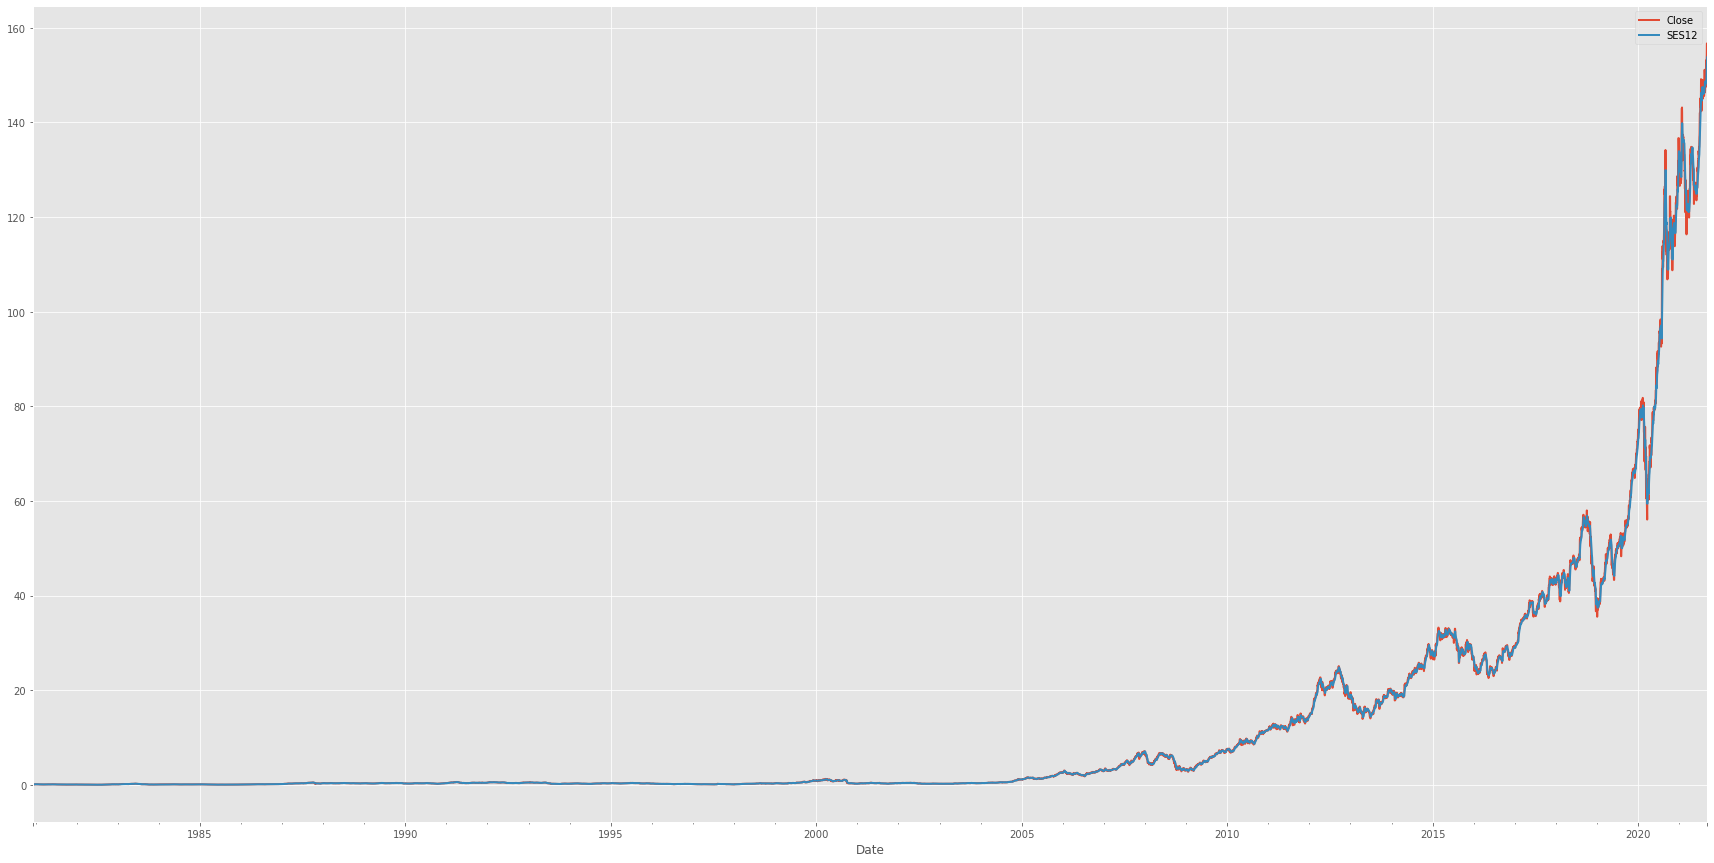

In [41]:
df[['Close',"SES12"]].plot(figsize=(30,15)).autoscale(axis='x',tight=True);

In [42]:
df['DESadd12'] = ExponentialSmoothing(df['Open'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return,6-month-SMA,12-month-SMA,2-month-SMA,EWMA12,SES12,DESadd12
Date,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600.0,4.690336e+08,NaN,NaN,NaN,NaN,0.128348,0.128348,0.128353
1980-12-13,0.122210,0.122210,0.121652,0.121652,0.095352,175884800.0,1.758848e+08,-0.625006,NaN,NaN,0.125279,0.126984,0.126984,0.122300
1980-12-14,0.122210,0.122210,0.121652,0.121652,0.095352,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125923,0.125923,0.122211
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125098,0.125098,0.122210
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000.0,1.057280e+08,-0.398879,NaN,NaN,0.117746,0.122472,0.122472,0.113400


<AxesSubplot:xlabel='Date'>

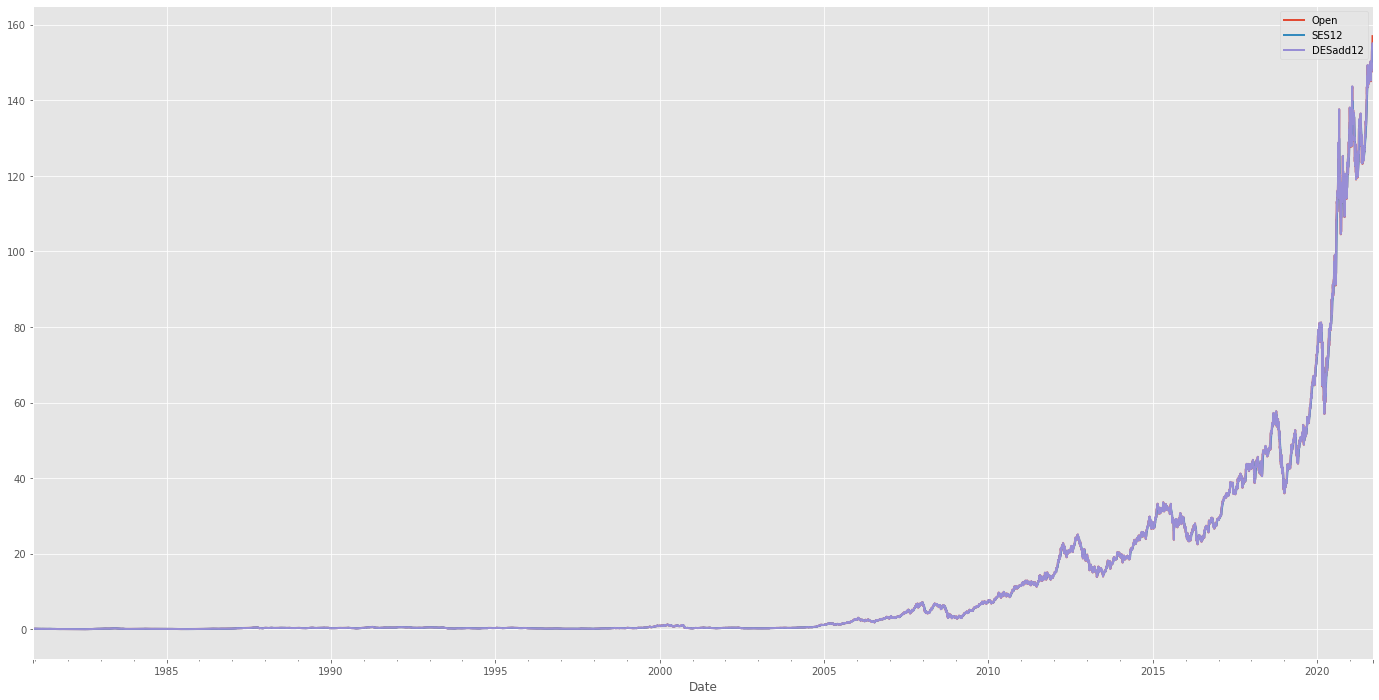

In [43]:
df[['Open',  'SES12', 'DESadd12']].plot(figsize=(24,12))

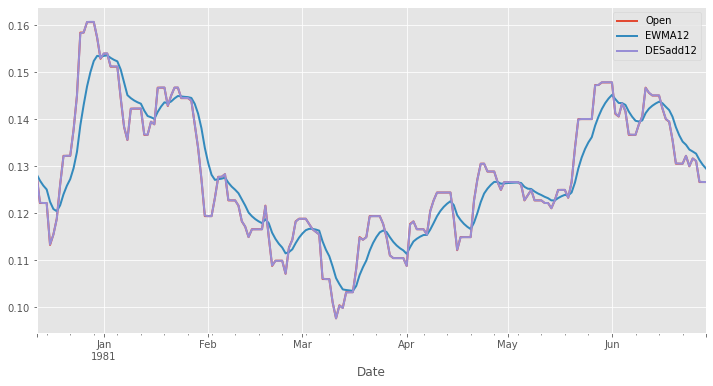

In [44]:
df[['Open','EWMA12','DESadd12']].iloc[:200].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [45]:
df['DESmul12'] = ExponentialSmoothing(df['Open'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return,6-month-SMA,12-month-SMA,2-month-SMA,EWMA12,SES12,DESadd12,DESmul12
Date,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600.0,4.690336e+08,NaN,NaN,NaN,NaN,0.128348,0.128348,0.128353,0.126281
1980-12-13,0.122210,0.122210,0.121652,0.121652,0.095352,175884800.0,1.758848e+08,-0.625006,NaN,NaN,0.125279,0.126984,0.126984,0.122300,0.122381
1980-12-14,0.122210,0.122210,0.121652,0.121652,0.095352,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125923,0.125923,0.122211,0.122315
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125098,0.125098,0.122210,0.122314
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000.0,1.057280e+08,-0.398879,NaN,NaN,0.117746,0.122472,0.122472,0.113400,0.113529


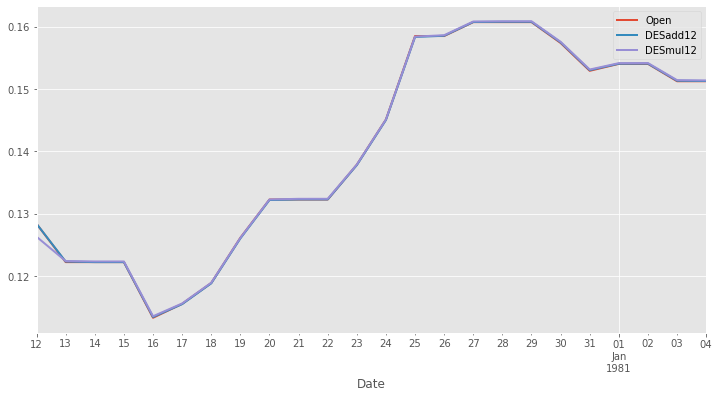

In [46]:
df[['Open','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [47]:
df['TESadd12'] = ExponentialSmoothing(df['Open'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return,6-month-SMA,12-month-SMA,2-month-SMA,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Date,,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600.0,4.690336e+08,NaN,NaN,NaN,NaN,0.128348,0.128348,0.128353,0.126281,0.128293
1980-12-13,0.122210,0.122210,0.121652,0.121652,0.095352,175884800.0,1.758848e+08,-0.625006,NaN,NaN,0.125279,0.126984,0.126984,0.122300,0.122381,0.128707
1980-12-14,0.122210,0.122210,0.121652,0.121652,0.095352,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125923,0.125923,0.122211,0.122315,0.140636
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125098,0.125098,0.122210,0.122314,0.111147
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000.0,1.057280e+08,-0.398879,NaN,NaN,0.117746,0.122472,0.122472,0.113400,0.113529,0.110341


In [48]:
df['TESmul12'] = ExponentialSmoothing(df['Open'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return,6-month-SMA,12-month-SMA,2-month-SMA,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Date,,,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600.0,4.690336e+08,NaN,NaN,NaN,NaN,0.128348,0.128348,0.128353,0.126281,0.128293,0.188107
1980-12-13,0.122210,0.122210,0.121652,0.121652,0.095352,175884800.0,1.758848e+08,-0.625006,NaN,NaN,0.125279,0.126984,0.126984,0.122300,0.122381,0.128707,0.039911
1980-12-14,0.122210,0.122210,0.121652,0.121652,0.095352,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125923,0.125923,0.122211,0.122315,0.140636,0.006514
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125098,0.125098,0.122210,0.122314,0.111147,0.008127
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000.0,1.057280e+08,-0.398879,NaN,NaN,0.117746,0.122472,0.122472,0.113400,0.113529,0.110341,0.003002


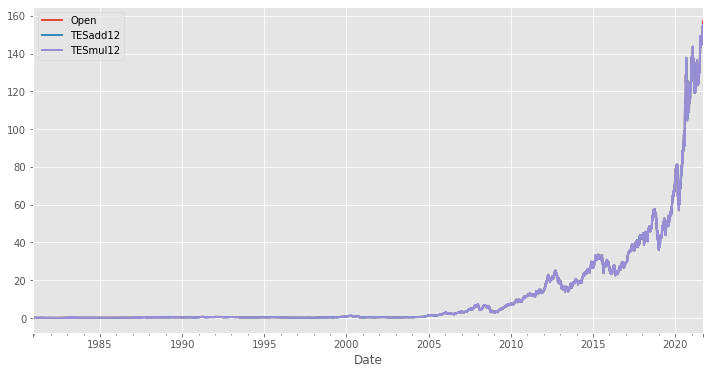

In [49]:
df[['Open','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

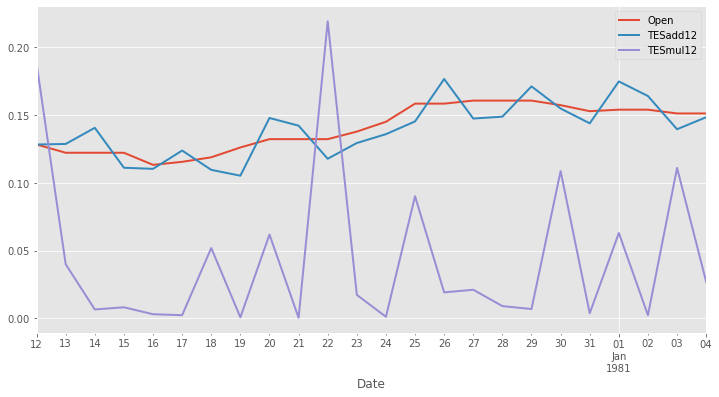

In [50]:
df[['Open','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

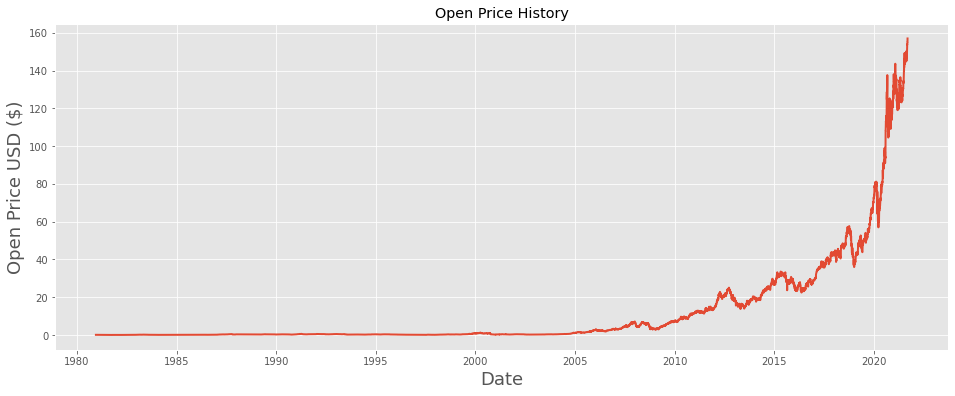

In [51]:
plt.figure(figsize=(16,6))
plt.title('Open Price History')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

### LSTM MODEL 

In [52]:
data = df.filter(['Open'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

14137

In [53]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[5.01388097e-04],
       [4.62275199e-04],
       [4.62275199e-04],
       ...,
       [9.87191800e-01],
       [9.87191800e-01],
       [1.00000000e+00]])

In [54]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        

x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00050139, 0.00046228, 0.00046228, 0.00046228, 0.00040538,
       0.0004196 , 0.00044094, 0.00048717, 0.00052628, 0.00052628,
       0.00052628, 0.00056184, 0.00060807, 0.00069341, 0.00069341,
       0.00070763, 0.00070763, 0.00070763, 0.0006863 , 0.00065785,
       0.00066496, 0.00066496, 0.00064719, 0.00064719, 0.00064719,
       0.00060451, 0.0005654 , 0.00054762, 0.00059029, 0.00059029,
       0.00059029, 0.00059029, 0.00055473, 0.00055473, 0.00057251,
       0.00056895, 0.00061873, 0.00061873, 0.00061873, 0.00059384,
       0.00060807, 0.00061873, 0.00061873, 0.00060451, 0.00060451,
       0.00060451, 0.00060095, 0.00056895, 0.00053695, 0.00049428,
       0.0004445 , 0.0004445 , 0.0004445 , 0.00046939, 0.00049783,
       0.00049783, 0.00050139, 0.00046583, 0.00046583, 0.00046583])]
[0.00045871948106704754]

[array([0.00050139, 0.00046228, 0.00046228, 0.00046228, 0.00040538,
       0.0004196 , 0.00044094, 0.00048717, 0.00052628, 0.00052628,
       0.00052628, 0.00056184, 0

In [55]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [56]:
callbacks = [EarlyStopping(patience=3, monitor='val_loss', mode='min'), 
             ReduceLROnPlateau(patience=2, verbose=1)] 

In [57]:
history =model.fit(x_train, y_train, 
                        epochs=20,
                        batch_size=128,
                        callbacks=[callbacks],
                        )

Epoch 1/20
110/110 [==============================] - 15s 110ms/step - loss: 4.1577e-04 - lr: 0.0010
Epoch 2/20
110/110 [==============================] - 12s 110ms/step - loss: 9.6971e-06 - lr: 0.0010
Epoch 3/20
110/110 [==============================] - 12s 108ms/step - loss: 9.5610e-06 - lr: 0.0010
Epoch 4/20
110/110 [==============================] - 12s 109ms/step - loss: 9.1222e-06 - lr: 0.0010
Epoch 5/20
110/110 [==============================] - 12s 107ms/step - loss: 9.3971e-06 - lr: 0.0010
Epoch 6/20
110/110 [==============================] - 12s 108ms/step - loss: 8.7612e-06 - lr: 0.0010
Epoch 7/20
110/110 [==============================] - 12s 110ms/step - loss: 9.3547e-06 - lr: 0.0010
Epoch 8/20
110/110 [==============================] - 12s 113ms/step - loss: 8.2529e-06 - lr: 0.0010
Epoch 9/20
110/110 [==============================] - 12s 107ms/step - loss: 7.7833e-06 - lr: 0.0010
Epoch 10/20
110/110 [==============================] - 12s 112ms/step - loss: 8.5303e-06 - 

In [58]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)
print(mean_absolute_error(y_test, predictions))

24/24 [==============================] - 1s 26ms/step
3.1358342185271892
2.2186062435561964


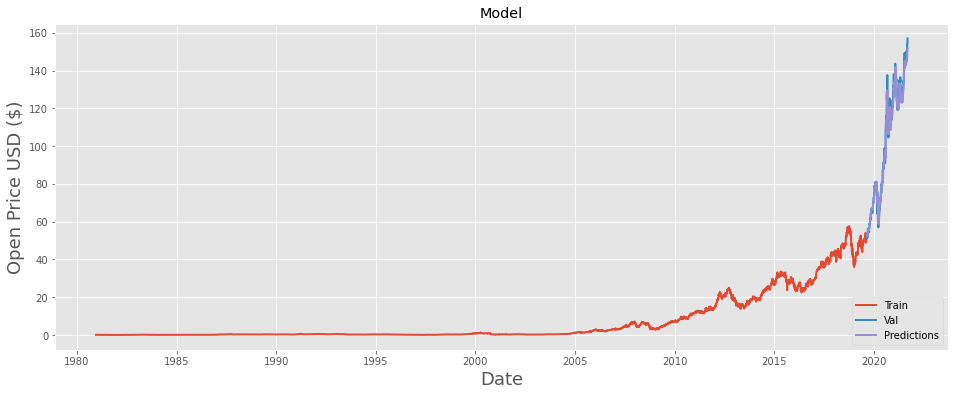

In [59]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

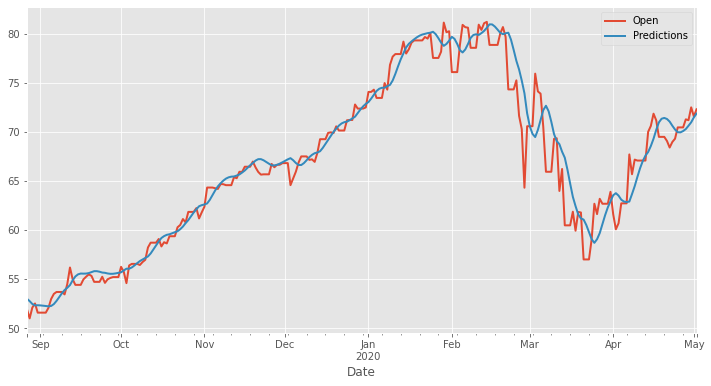

In [60]:
valid[['Open','Predictions']].iloc[:250].plot(figsize=(12,6)).autoscale(axis='x',tight=True);